In [1]:
!pip -q install qiskit qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.4 MB/s eta 0:00:00



=== EVOLVED STRUCTURE RUN ===
Gen 1/40 | cost=0.427348 | succ=0.6182 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 2/40 | cost=0.325785 | succ=0.7246 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 3/40 | cost=0.326762 | succ=0.7148 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 4/40 | cost=0.331156 | succ=0.7070 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 5/40 | cost=0.336039 | succ=0.7158 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 6/40 | cost=0.308207 | succ=0.7393 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 7/40 | cost=0.285746 | succ=0.7568 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 8/40 | cost=0.265238 | succ=0.7744 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 9/40 | cost=0.254984 | succ=0.7988 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 10/40 | cost=0.243754 | succ=0.7881 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 11/40 | cost=0.243266 | succ=0.7822 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 12/40 | cost=0.213969 | succ=0.7998 | cx=2.00 | depth=6.00 | bits=[1 1 0]
Gen 13/40 | cost=0.219828 | succ=0.8057 | 

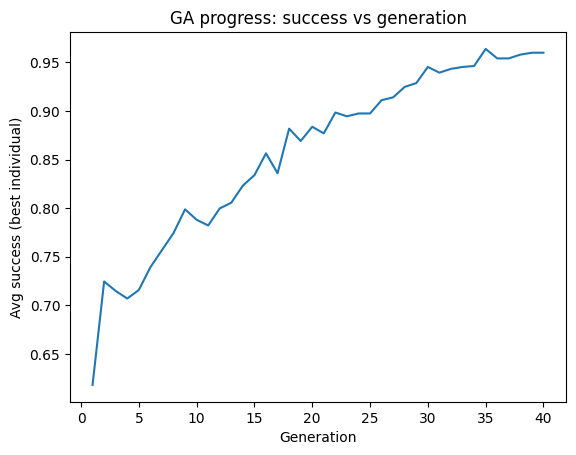

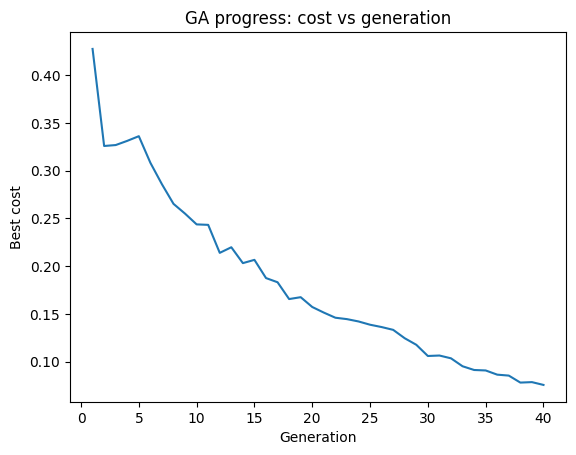

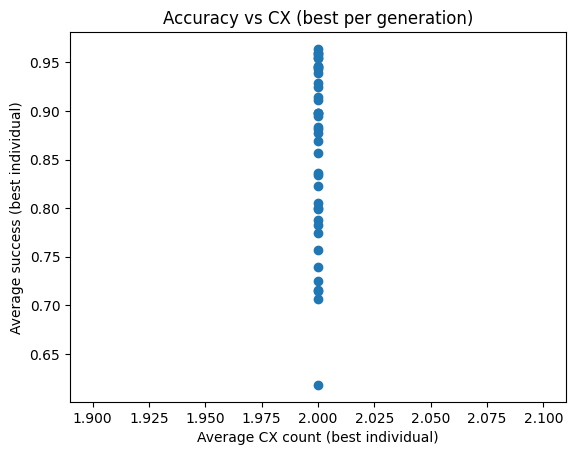

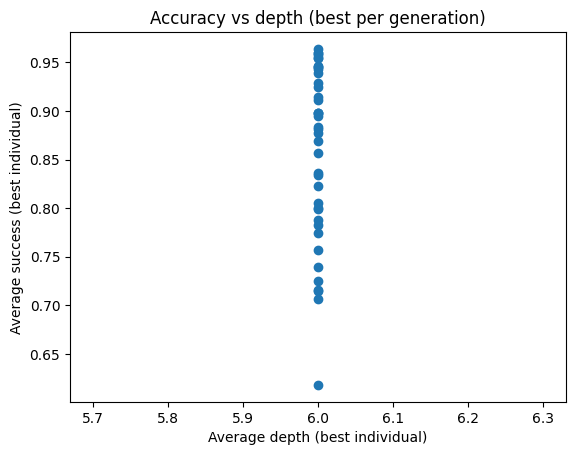


=== FIXED STRUCTURE RUN (bits=110) ===
[FIXED bits=(1, 1, 0)] Gen 1/40 | cost=0.341898 | succ=0.6963 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 2/40 | cost=0.341410 | succ=0.6875 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 3/40 | cost=0.273051 | succ=0.7744 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 4/40 | cost=0.256937 | succ=0.7686 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 5/40 | cost=0.246684 | succ=0.7939 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 6/40 | cost=0.246195 | succ=0.7998 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 7/40 | cost=0.228129 | succ=0.8193 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 8/40 | cost=0.225688 | succ=0.8086 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 9/40 | cost=0.203227 | succ=0.8164 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 10/40 | cost=0.199809 | succ=0.8350 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] Gen 11/40 | cost=0.201762 | succ=0.8301 | cx=2.00 | depth=6.00
[FIXED bits=(1, 1, 0)] 

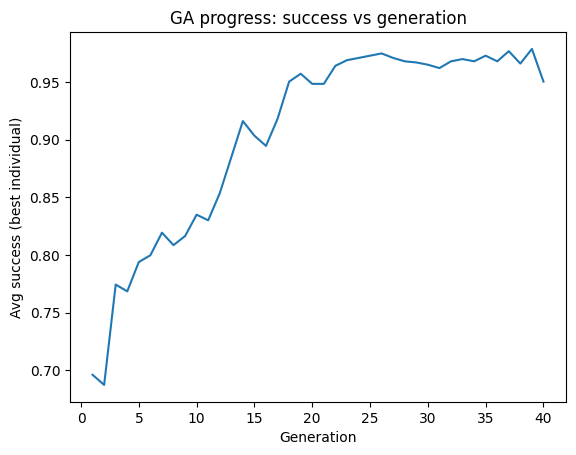

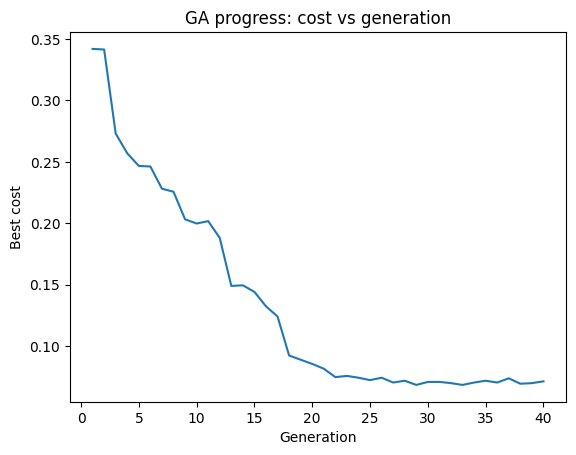

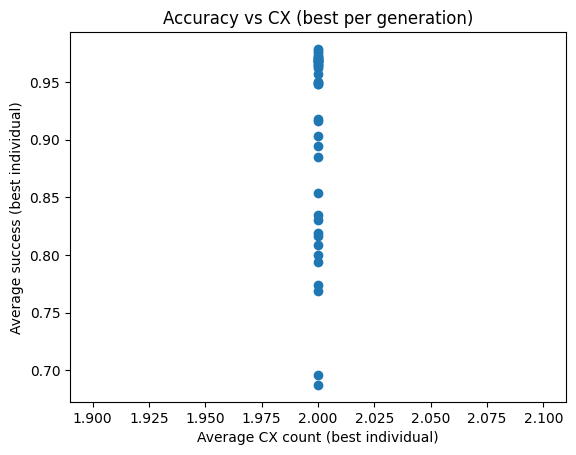

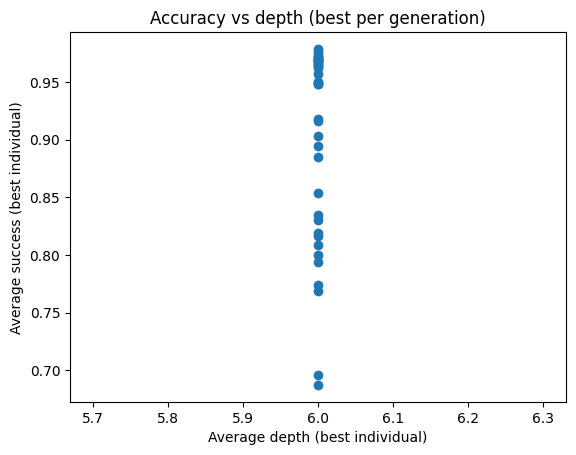


=== SUMMARY ===
Evolved: success=0.9649, CX=2.00, depth=6.00
Fixed  : success=0.9658, CX=2.00, depth=6.00


In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
import matplotlib.pyplot as plt



def build_approx_adder_genome(genome):
    # unpack genome
    theta1, theta2, theta3, theta4 = genome[:4]
    b1, b2, b3 = genome[4:].astype(int)


    qc = QuantumCircuit(3, name="ApproxAdder")

    qc.ry(theta1, 2)
    if b1 == 1:
        qc.cx(0, 2)

    qc.ry(theta2, 2)
    if b2 == 1:
        qc.cx(1, 2)

    qc.ry(theta3, 2)
    if b3 == 1:
        qc.cx(0, 2)

    qc.ry(theta4, 2)

    return qc


def make_noise_model(p1=0.001, p2=0.01, p_ro=0.02):
    noise_model = NoiseModel()

    # Depolarizing errors
    err1 = depolarizing_error(p1, 1)
    err2 = depolarizing_error(p2, 2)

    # Apply to common gates
    noise_model.add_all_qubit_quantum_error(err1, ['rx', 'ry', 'rz'])
    noise_model.add_all_qubit_quantum_error(err2, ['cx'])

    # Readout error: flips bit with probability p_ro
    ro = ReadoutError([[1 - p_ro, p_ro],
                       [p_ro, 1 - p_ro]])
    noise_model.add_all_qubit_readout_error(ro)

    return noise_model


SIMULATOR = AerSimulator()
NOISE_MODEL = make_noise_model()


def run_noisy_success_prob(x, y, thetas, simulator, noise_model, shots=2000, opt_level=1):
    qc = QuantumCircuit(3, 1)

    # Prepare |x,y,0>
    if x == 1:
        qc.x(0)
    if y == 1:
        qc.x(1)

    # Apply approximate adder
    qc.compose(build_approx_adder_genome(thetas), inplace=True)

    # Measure output qubit 2 into classical bit 0
    qc.measure(2, 0)

    # Transpile for the simulator basis
    tqc = transpile(qc, simulator, optimization_level=opt_level)

    # Run with noise
    result = simulator.run(tqc, noise_model=noise_model, shots=shots).result()
    counts = result.get_counts(tqc)

    # Target: XOR
    z_target = (x + y) % 2
    target_key = str(z_target)

    # success probability
    p_success = counts.get(target_key, 0) / shots
    return p_success, tqc


def circuit_complexity(tqc: QuantumCircuit):
    # depth after transpile (more realistic)
    depth = tqc.depth()

    # count CX gates after transpile
    ops = tqc.count_ops()
    cx_count = ops.get('cx', 0)

    return depth, cx_count


def evaluate_best(genome, shots=4000):
    inputs = [(0,0),(0,1),(1,0),(1,1)]
    succ = []
    cxs = []
    depths = []
    for x,y in inputs:
        p, tqc = run_noisy_success_prob(x, y, genome, SIMULATOR, NOISE_MODEL, shots=shots)
        succ.append(p)
        d, cx = circuit_complexity(tqc)
        depths.append(d)
        cxs.append(cx)
    return np.mean(succ), np.mean(cxs), np.mean(depths)


def adder_cost_noisy(thetas,
                     simulator=SIMULATOR,
                     noise_model=NOISE_MODEL,
                     shots=512,
                     lam_cx=0.02, mu_depth=0.001,
                     opt_level=1):
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    successes, depths, cxs = [], [], []

    for x, y in inputs:
        p_succ, tqc = run_noisy_success_prob(
            x, y, thetas,
            simulator=simulator,
            noise_model=noise_model,
            shots=shots,
            opt_level=opt_level
        )

        successes.append(p_succ)

        d, cx = circuit_complexity(tqc)
        depths.append(d)
        cxs.append(cx)

    avg_success = float(np.mean(successes))
    avg_depth = float(np.mean(depths))
    avg_cx = float(np.mean(cxs))

    cost = (1.0 - avg_success) + lam_cx * avg_cx + mu_depth * avg_depth
    return cost


def tournament_selection(pop, scores, k=3):
    selected_idx = np.random.choice(len(pop), k, replace=False)
    best_idx = min(selected_idx, key=lambda i: scores[i])
    return pop[best_idx].copy()


def crossover(parent1, parent2, prob=0.7):
    if np.random.rand() > prob:
        return parent1.copy(), parent2.copy()
    point = np.random.randint(1, len(parent1))
    c1 = np.concatenate([parent1[:point], parent2[point:]])
    c2 = np.concatenate([parent2[:point], parent1[point:]])
    return c1, c2


def init_population(pop_size):
    population = []
    for _ in range(pop_size):
        angles = np.random.uniform(-np.pi, np.pi, 4)
        bits = np.random.randint(0, 2, 3)
        genome = np.concatenate([angles, bits])
        population.append(genome)
    return population


def mutate(vector, prob=0.1, sigma=0.1):
    # mutate angles
    for i in range(4):
        if np.random.rand() < prob:
            vector[i] += np.random.normal(0.0, sigma)

    # wrap angles
    vector[:4] = (vector[:4] + np.pi) % (2*np.pi) - np.pi

    # mutate binary structure genes
    for i in range(4, 7):
        if np.random.rand() < prob:
            vector[i] = 1 - vector[i]

    vector[4:7] = np.round(vector[4:7]).astype(int)
    vector[4:7] = np.clip(vector[4:7], 0, 1)


    return vector


def genetic_optimisation(pop_size=30, num_generations=40, verbose=True, eval_shots=256):
    population = init_population(pop_size)
    scores = [adder_cost_noisy(ind) for ind in population]

    history = []  # list of dicts per generation

    for gen in range(num_generations):
        new_pop = []

        # elitism
        best_idx = int(np.argmin(scores))
        best_ind = population[best_idx].copy()
        new_pop.append(best_ind)

        while len(new_pop) < pop_size:
            p1 = tournament_selection(population, scores)
            p2 = tournament_selection(population, scores)

            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)

            new_pop.append(c1)
            if len(new_pop) < pop_size:
                new_pop.append(c2)

        population = new_pop
        scores = [adder_cost_noisy(ind) for ind in population]

        # log stats for best individual of this generation
        best_idx = int(np.argmin(scores))
        best_ind = population[best_idx].copy()
        best_cost = float(scores[best_idx])

        avg_succ, avg_cx, avg_depth = evaluate_best(best_ind, shots=eval_shots)

        history.append({
            "gen": gen + 1,
            "best_cost": best_cost,
            "avg_success": float(avg_succ),
            "avg_cx": float(avg_cx),
            "avg_depth": float(avg_depth),
            "bits": best_ind[4:7].astype(int).copy()
        })

        if verbose:
            print(f"Gen {gen+1}/{num_generations} | cost={best_cost:.6f} | succ={avg_succ:.4f} | cx={avg_cx:.2f} | depth={avg_depth:.2f} | bits={best_ind[4:7].astype(int)}")

    # return final best + history
    best_idx = int(np.argmin(scores))
    return population[best_idx], float(scores[best_idx]), history


def init_population_fixed(pop_size, fixed_bits=(1,1,0)):
    population = []
    bits = np.array(fixed_bits, dtype=int)
    for _ in range(pop_size):
        angles = np.random.uniform(-np.pi, np.pi, 4)
        genome = np.concatenate([angles, bits])
        population.append(genome)
    return population


def mutate_fixed(vector, prob=0.1, sigma=0.1, fixed_bits=(1,1,0)):
    # mutate angles only
    for i in range(4):
        if np.random.rand() < prob:
            vector[i] += np.random.normal(0.0, sigma)

    vector[:4] = (vector[:4] + np.pi) % (2*np.pi) - np.pi

    # force bits fixed
    vector[4:7] = np.array(fixed_bits, dtype=int)
    return vector


def genetic_optimisation_fixed(pop_size=30, num_generations=40, fixed_bits=(1,1,0), verbose=True, eval_shots=256):
    population = init_population_fixed(pop_size, fixed_bits=fixed_bits)
    scores = [adder_cost_noisy(ind) for ind in population]

    history = []

    for gen in range(num_generations):
        new_pop = []

        best_idx = int(np.argmin(scores))
        best_ind = population[best_idx].copy()
        new_pop.append(best_ind)

        while len(new_pop) < pop_size:
            p1 = tournament_selection(population, scores)
            p2 = tournament_selection(population, scores)

            c1, c2 = crossover(p1, p2)
            c1 = mutate_fixed(c1, fixed_bits=fixed_bits)
            c2 = mutate_fixed(c2, fixed_bits=fixed_bits)

            new_pop.append(c1)
            if len(new_pop) < pop_size:
                new_pop.append(c2)

        population = new_pop
        scores = [adder_cost_noisy(ind) for ind in population]

        best_idx = int(np.argmin(scores))
        best_ind = population[best_idx].copy()
        best_cost = float(scores[best_idx])

        avg_succ, avg_cx, avg_depth = evaluate_best(best_ind, shots=eval_shots)

        history.append({
            "gen": gen + 1,
            "best_cost": best_cost,
            "avg_success": float(avg_succ),
            "avg_cx": float(avg_cx),
            "avg_depth": float(avg_depth),
            "bits": np.array(fixed_bits, dtype=int)
        })

        if verbose:
            print(f"[FIXED bits={fixed_bits}] Gen {gen+1}/{num_generations} | cost={best_cost:.6f} | succ={avg_succ:.4f} | cx={avg_cx:.2f} | depth={avg_depth:.2f}")

    best_idx = int(np.argmin(scores))
    return population[best_idx], float(scores[best_idx]), history


def plot_history(history):
    gens = [h["gen"] for h in history]
    succ = [h["avg_success"] for h in history]
    cx = [h["avg_cx"] for h in history]
    depth = [h["avg_depth"] for h in history]
    cost = [h["best_cost"] for h in history]

    # Learning curve: success over generations
    plt.figure()
    plt.plot(gens, succ)
    plt.xlabel("Generation")
    plt.ylabel("Avg success (best individual)")
    plt.title("GA progress: success vs generation")
    plt.show()

    # Learning curve: cost over generations
    plt.figure()
    plt.plot(gens, cost)
    plt.xlabel("Generation")
    plt.ylabel("Best cost")
    plt.title("GA progress: cost vs generation")
    plt.show()

    # Scatter: success vs CX count
    plt.figure()
    plt.scatter(cx, succ)
    plt.xlabel("Average CX count (best individual)")
    plt.ylabel("Average success (best individual)")
    plt.title("Accuracy vs CX (best per generation)")
    plt.show()

    # Scatter: success vs depth
    plt.figure()
    plt.scatter(depth, succ)
    plt.xlabel("Average depth (best individual)")
    plt.ylabel("Average success (best individual)")
    plt.title("Accuracy vs depth (best per generation)")
    plt.show()


def main():
    np.random.seed(123)

    print("\n=== EVOLVED STRUCTURE RUN ===")
    best_genome_evo, best_cost_evo, hist_evo = genetic_optimisation()

    print("\nBest evolved genome:", best_genome_evo)
    print("Angles:", best_genome_evo[:4])
    print("CNOT bits:", best_genome_evo[4:7].astype(int))
    avg_succ, avg_cx, avg_depth = evaluate_best(best_genome_evo, shots=4000)
    print(f"Evolved | Avg success: {avg_succ:.4f}, Avg CX: {avg_cx:.2f}, Avg depth: {avg_depth:.2f}")

    plot_history(hist_evo)

    print("\n=== FIXED STRUCTURE RUN (bits=110) ===")
    best_genome_fix, best_cost_fix, hist_fix = genetic_optimisation_fixed(fixed_bits=(1,1,0))

    print("\nBest fixed genome:", best_genome_fix)
    print("Angles:", best_genome_fix[:4])
    print("CNOT bits:", best_genome_fix[4:7].astype(int))
    avg_succ_f, avg_cx_f, avg_depth_f = evaluate_best(best_genome_fix, shots=4000)
    print(f"Fixed | Avg success: {avg_succ_f:.4f}, Avg CX: {avg_cx_f:.2f}, Avg depth: {avg_depth_f:.2f}")

    plot_history(hist_fix)

    # One summary comparison
    print("\n=== SUMMARY ===")
    print(f"Evolved: success={avg_succ:.4f}, CX={avg_cx:.2f}, depth={avg_depth:.2f}")
    print(f"Fixed  : success={avg_succ_f:.4f}, CX={avg_cx_f:.2f}, depth={avg_depth_f:.2f}")


if __name__ == "__main__":
    main()

